In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from gensim import matutils
import numpy as np
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load model
model_10k = KeyedVectors.load("../models/movie-reviews-vectors-10k.w2v", mmap='r')

In [3]:
model_10k.distance("beautiful","ugly")

0.7343211770057678

In [4]:
model_10k.most_similar("beautiful",topn=25)

[('lovely', 0.6718183159828186),
 ('gorgeous', 0.6443194150924683),
 ('lush', 0.5849355459213257),
 ('sensuous', 0.5718914866447449),
 ('luscious', 0.5692052841186523),
 ('alluring', 0.550600528717041),
 ('radiant', 0.5416762232780457),
 ('stunning', 0.5370165109634399),
 ('exquisite', 0.5362687110900879),
 ('stunningly', 0.5309812426567078),
 ('sumptuous', 0.5180782079696655),
 ('majestic', 0.510532557964325),
 ('handsome', 0.5062849521636963),
 ('exotic', 0.5053898096084595),
 ('glorious', 0.49979379773139954),
 ('elegant', 0.49870815873146057),
 ('vibrant', 0.4952318072319031),
 ('homely', 0.4946947395801544),
 ('drop-dead', 0.4851617217063904),
 ('attractive', 0.4848383665084839),
 ('landscapes', 0.4828457236289978),
 ('sensual', 0.4822973608970642),
 ('dreamy', 0.4804701507091522),
 ('hauntingly', 0.4772157371044159),
 ('ravishing', 0.47534918785095215)]

In [5]:
model_1k = KeyedVectors.load("../models/movie-reviews-vectors.w2v", mmap='r')

In [6]:
model_1k.distance("beautiful","ugly")

0.7483392357826233

In [7]:
model_1k.most_similar("beautiful",topn=25)

[('lovely', 0.6483579277992249),
 ('gorgeous', 0.62788987159729),
 ('lush', 0.5810469388961792),
 ('luscious', 0.550052285194397),
 ('stunningly', 0.5431858897209167),
 ('exotic', 0.5390868782997131),
 ('exquisite', 0.5359506607055664),
 ('stunning', 0.5317294597625732),
 ('strikingly', 0.5152056217193604),
 ('landscapes', 0.513120174407959),
 ('attractive', 0.5107636451721191),
 ('elegant', 0.5033050775527954),
 ('vibrant', 0.5001901984214783),
 ('handsome', 0.49425560235977173),
 ('wonderful', 0.4925268888473511),
 ('radiant', 0.49021339416503906),
 ('sumptuous', 0.4887653589248657),
 ('bella', 0.48738494515419006),
 ('venice', 0.48690202832221985),
 ('beauty', 0.4821345806121826),
 ('dreamy', 0.4820576608181),
 ('picturesque', 0.4791985750198364),
 ('breathtaking', 0.478875070810318),
 ('alluring', 0.47534841299057007),
 ('majestic', 0.47247177362442017)]

In [8]:
model_1k.most_similar(positive=["beautiful"],negative=["person"],topn=25)

[('lush', 0.5353505611419678),
 ('sumptuous', 0.5082869529724121),
 ('gorgeous', 0.5075263977050781),
 ('stunning', 0.4784661829471588),
 ('exquisite', 0.4684586226940155),
 ('stunningly', 0.4666895270347595),
 ('lovely', 0.4664616584777832),
 ('breathtaking', 0.4643445611000061),
 ('majestic', 0.46194618940353394),
 ('luscious', 0.45489704608917236),
 ('lavish', 0.4536886513233185),
 ('picturesque', 0.4498661160469055),
 ('landscapes', 0.4487718939781189),
 ('exotic', 0.4423663318157196),
 ('splendor', 0.4406932592391968),
 ('verdant', 0.4402364194393158),
 ('breathtakingly', 0.43751761317253113),
 ('browns', 0.43536999821662903),
 ('venice', 0.43200644850730896),
 ('emerald', 0.42915481328964233),
 ('warmly', 0.42646265029907227),
 ('gossamer', 0.4208014905452728),
 ('cottages', 0.41999906301498413),
 ('1583', 0.41763895750045776),
 ('djibouti', 0.4078821539878845)]

In [9]:
# plot neighbors
response = model_1k.most_similar(positive=["beautiful"],negative=["person"],topn=25)
neighbor_list=list()
words=list()
for i in response:
    words.append(i[0])
    neighbor_list.append(model_1k[i[0]])

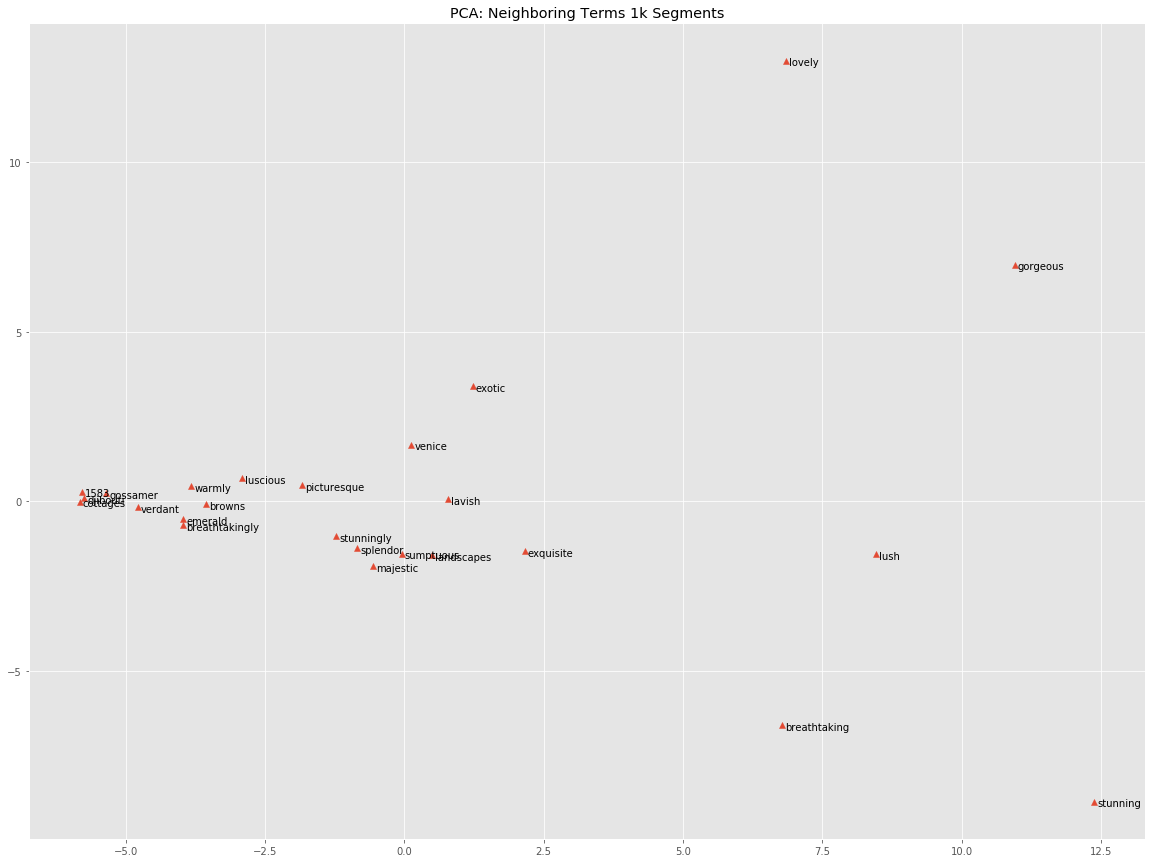

In [11]:
pca = PCA(n_components=2)

plot_data = pca.fit_transform(neighbor_list)
xs, ys = plot_data[:, 0], plot_data[:, 1]

fig = plt.figure(figsize=(20, 15))
plt.clf()
plt.title("PCA: Neighboring Terms 1k Segments")
plt.scatter(xs, ys, marker = '^')
for i, w in enumerate(words):
     plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top')

plt.style.use('ggplot')
plt.show()